<a href="https://colab.research.google.com/github/ladylaura22/Colab_ejemplo/blob/main/Encuentro_AAA_semana_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("california_housing_train.csv")


In [ ]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


PUNTO 1

1.	Importar las bibliotecas: Utilizamos pandas para manipulación de datos, matplotlib para visualización, y KMeans de sklearn para aplicar el algoritmo.
2.	Cargar datos: Leemos el archivo CSV donde está el dataset y extraemos las variables longitude y latitude.
3.	Aplicamos K-means: Para cada número de grupos (3, 4, y 5), entrenamos el modelo de K-means. El algoritmo agrupa los datos en clusters que minimizan la distancia al centroide del grupo.
4.  Resultados: Los resultados de cada agrupación se agregan al dataframe variables como una nueva columna con las etiquetas de los grupos.
5.	Visualización: Usamos un gráfico de dispersión para mostrar los clusters resultantes. Cada punto representa una manzana, y su color indica a qué grupo pertenece.





In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el dataset
data =pd.read_csv("california_housing_train.csv")
# Extraer las variables 'longitude' y 'latitude' para el análisis
variables = data[['longitude', 'latitude']]



/tmp/ipython-input-1779346585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[f'cluster_{n_clusters}'] = kmeans.labels_


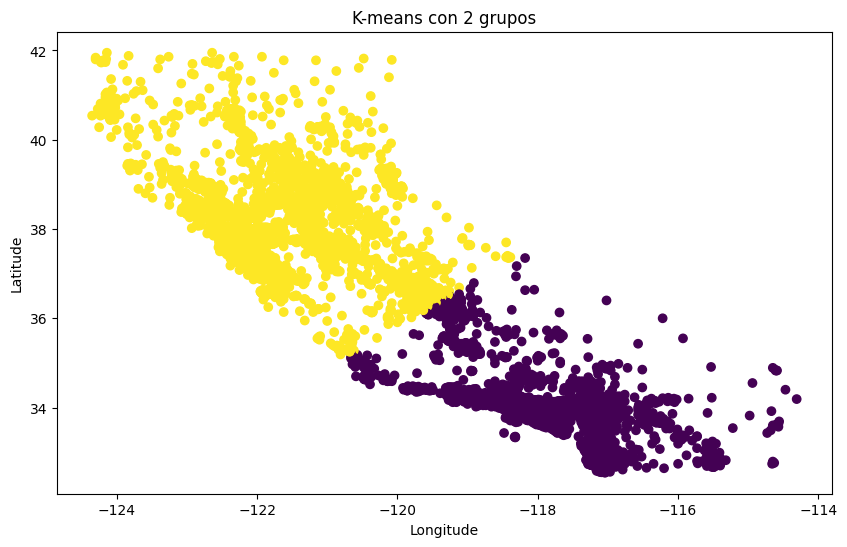

/tmp/ipython-input-1779346585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[f'cluster_{n_clusters}'] = kmeans.labels_


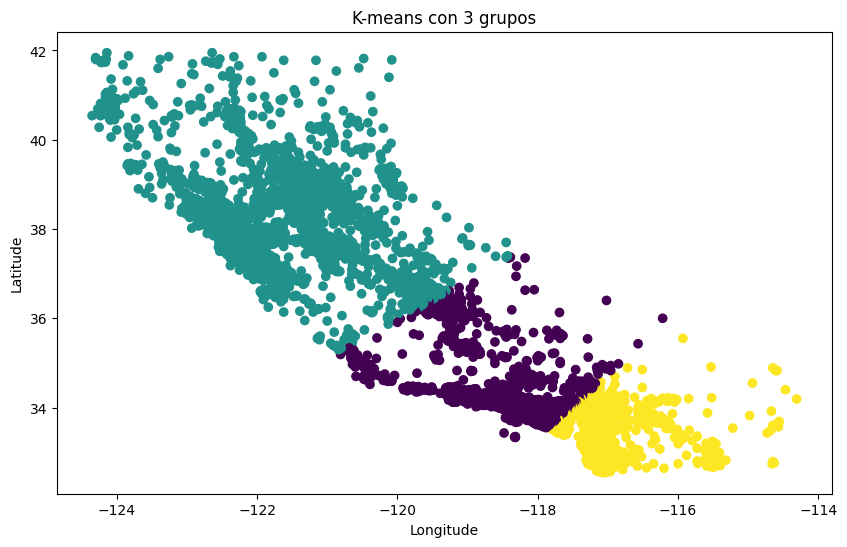

/tmp/ipython-input-1779346585.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[f'cluster_{n_clusters}'] = kmeans.labels_


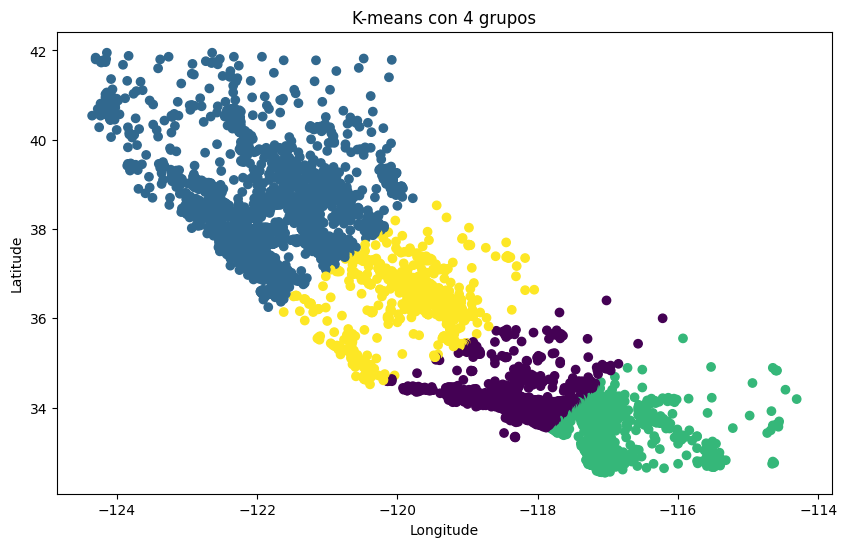

In [ ]:
# Crear el modelo de K-means para diferentes cantidades de grupos
n_clusters_options = [2, 3, 4]  # Número de grupos a probar

# Visualizar los resultados de K-means para cada valor de grupos
for n_clusters in n_clusters_options:
    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(variables)

    # Agregar los resultados de K-means al dataframe
    variables[f'cluster_{n_clusters}'] = kmeans.labels_

    # Visualizar la agrupación
    plt.figure(figsize=(10, 6))
    plt.scatter(variables['longitude'], variables['latitude'], c=variables[f'cluster_{n_clusters}'], cmap='viridis', marker='o')
    plt.title(f'K-means con {n_clusters} grupos')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


PUNTO ADICIONAL (SE TRATA DE APLICAR LAS MEDICIONES ESTADISTICAS)

Este punto adicional se hace con el objetivo de visualizar algunas medidas de tendencia central para poder entender y analizar de una mejor manera los resultados de agrupacion estadistica.


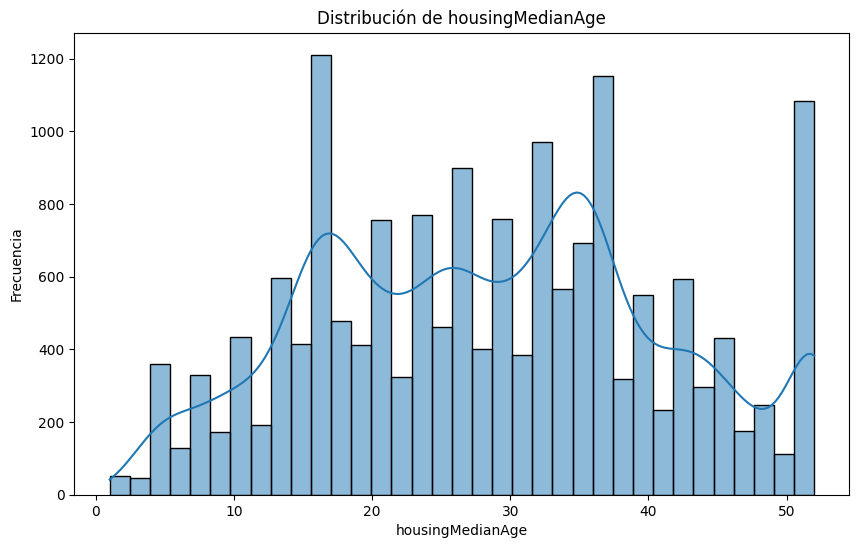

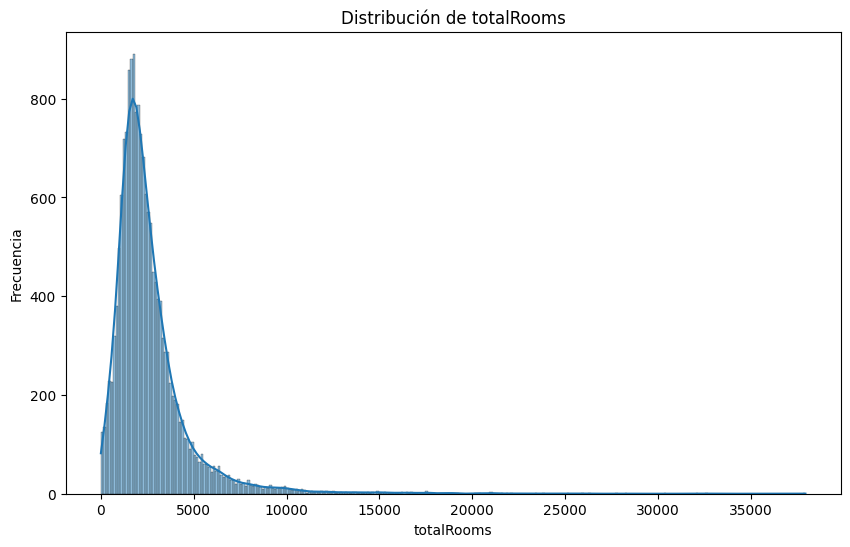

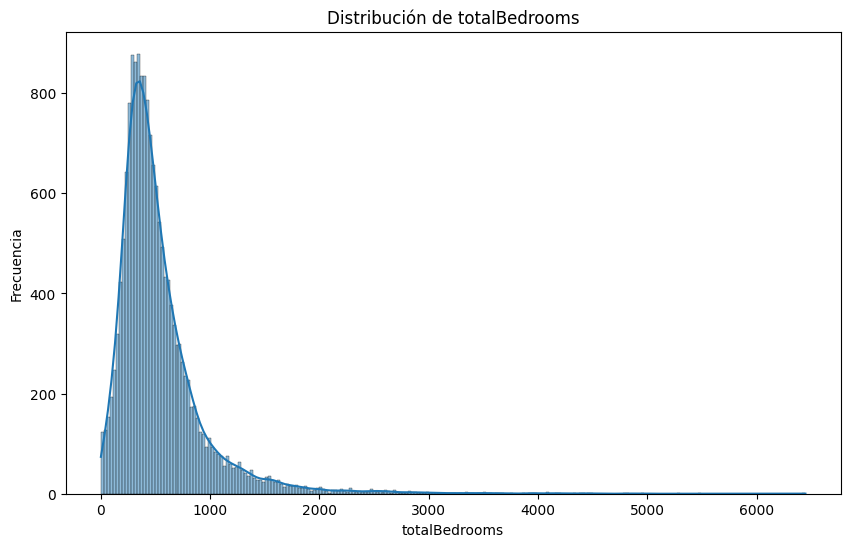

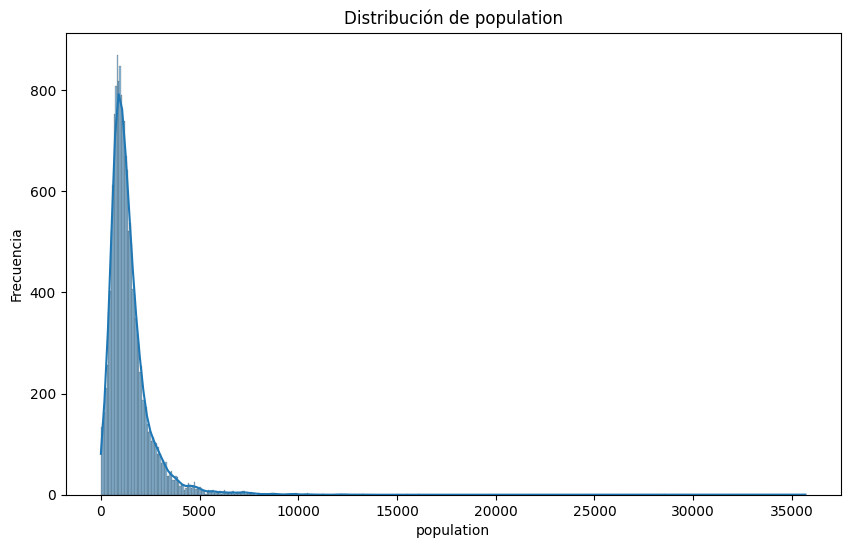

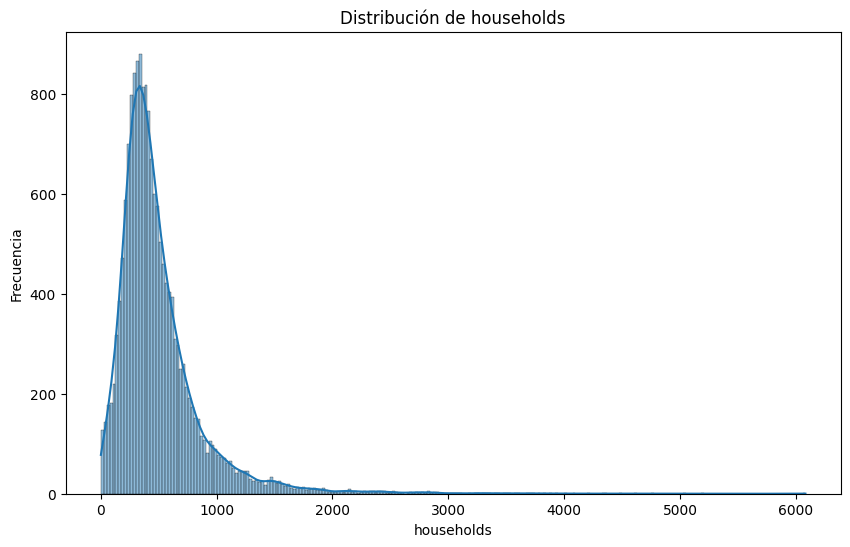

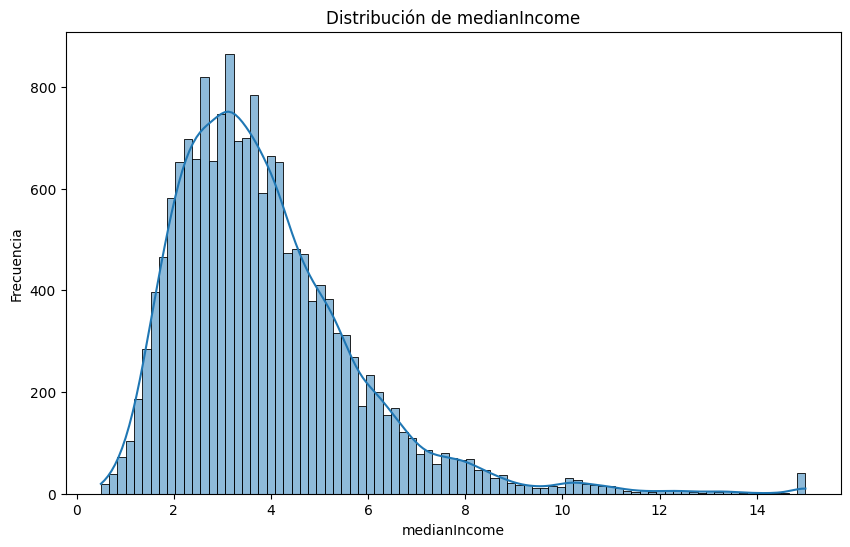

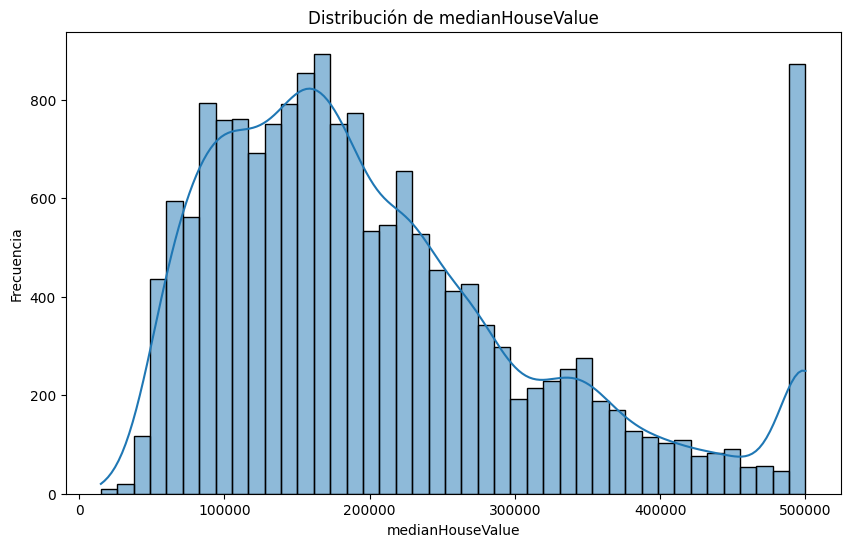

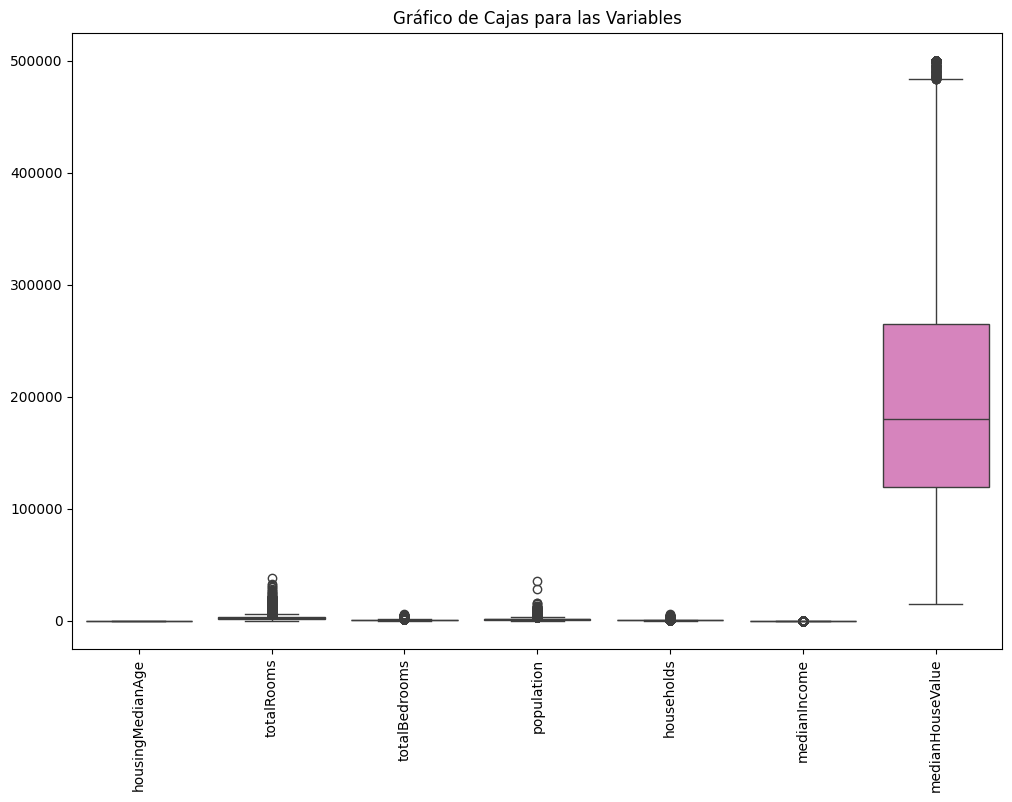

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Variables a analizar
variables = data[['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']]

# Calcular medidas de tendencia central y dispersión
estadisticas = variables.describe()

# Añadir medidas adicionales como asimetría y curtosis
estadisticas.loc['skew'] = variables.apply(lambda x: skew(x))
estadisticas.loc['kurtosis'] = variables.apply(lambda x: kurtosis(x))

# Gráficas de distribución
for column in variables.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(variables[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficas de caja (boxplots) para ver la dispersión y outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=variables)
plt.title('Gráfico de Cajas para las Variables')
plt.xticks(rotation=90)
plt.show()


PUNTO 2
1.	Aplicamos K-means: Realizamos K-means para diferentes valores de k (cantidad de clusters), desde 1 hasta 10. Para cada valor de k, calculamos la inercia.
2.	Método del codo: Graficamos la inercia en función del número de clusters y seleccionamos el número de grupos en el punto donde el gráfico comienza a aplanarse (el codo).
3.	Decisión: Con base en la gráfica, elegimos el número óptimo de clusters.
4.	En el gráfico resultante, buscamos el punto en el que la reducción de la inercia deja de ser significativa al aumentar el número de clusters.
5.  Este "codo" del gráfico indica el número óptimo de clusters. Si el gráfico muestra un cambio de pendiente significativo en 3 o 4 clusters, entonces es razonable elegir uno de esos valores.




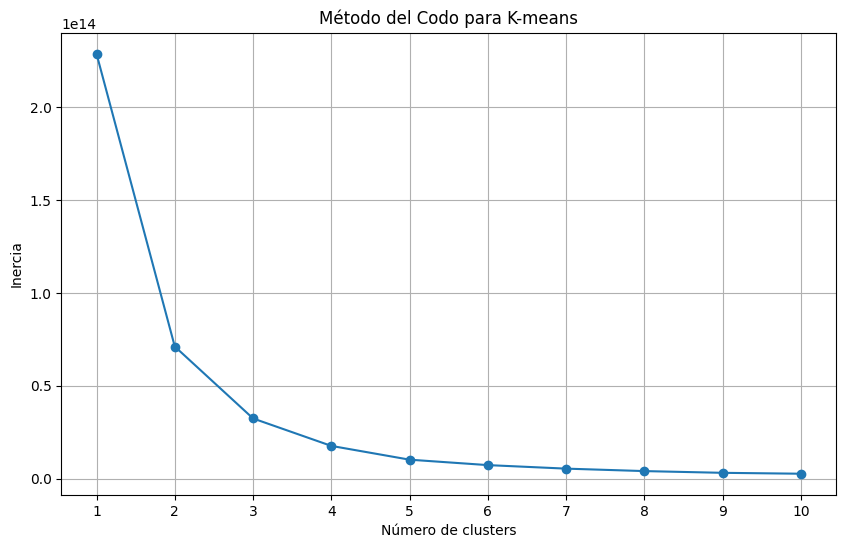

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-means para un rango de grupos y calcular la inercia
inertia = []
cluster_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


PUNTO 3

En esta parte calcularemos la matriz de correlación entre las variables del dataset y realizamos su representación gráfica.Seguimos los siguientes pasos:
1.	Cálculo de la matriz de correlación: Usamos las variables proporcionadas en el dataset y calculamos la correlación entre ellas.La correlación mide la relación lineal entre dos variables y está en el rango de -1 a 1. Valores cercanos a 1 indican una correlación positiva fuerte, valores cercanos a -1 indican una correlación negativa fuerte, y valores cercanos a 0 indican que no hay una relación lineal fuerte entre las variables.
2.	Hacemos la representación gráfica: Visualizamos la matriz de correlación mediante un mapa de calor (heatmap) para identificar rápidamente las relaciones más fuertes y más débiles entre las variables.
3.	Análisis: A partir de la matriz de correlación, analizamos qué variables tienen relaciones fuertes y si existen patrones interesantes.
      **Correlaciones fuertes**:Variables como totalRooms, totalBedrooms, population, y households probablemente tengan correlaciones fuertes entre sí, ya que están relacionadas con la cantidad de personas y viviendas en las manzanas.Es esperable que haya una correlación positiva entre totalRooms y totalBedrooms, ya que un mayor número de habitaciones en una manzana también debería aumentar la cantidad de dormitorios.
      **	Correlaciones con medianHouseValue:**La variable medianIncome (ingreso medio) es una variable que suele estar correlacionada con el medianHouseValue (valor medio de la vivienda), ya que en zonas donde los ingresos son mayores, los precios de las viviendas también tienden a ser más altos.
      **Correlaciones débiles:**Algunas variables, como housingMedianAge (edad media de la vivienda), podrían mostrar correlaciones más débiles con otras variables, ya que la edad de las viviendas no necesariamente está relacionada con la cantidad de habitaciones o la población.



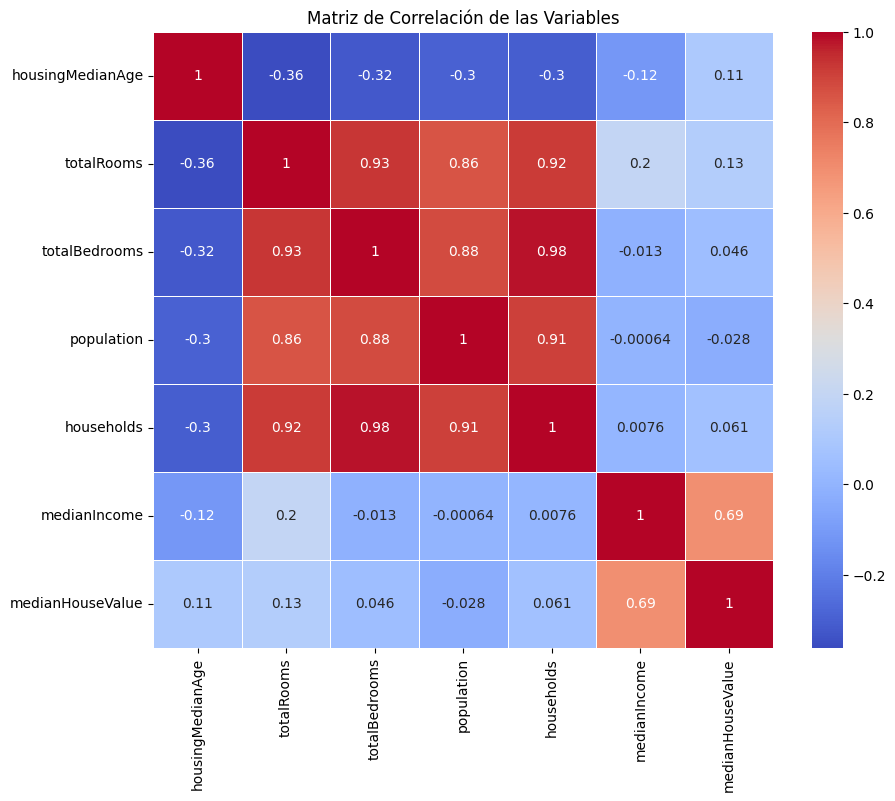

In [ ]:
# Seleccionar las variables relevantes para el análisis
variables = data[['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']]

# Calcular la matriz de correlación
correlation_matrix = variables.corr()

# Mostrar la matriz de correlación como un heatmap (mapa de calor)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()


In [ ]:
correlation_matrix

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
housingMedianAge,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
totalRooms,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
totalBedrooms,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
medianIncome,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
medianHouseValue,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


PUNTO 4

Se realiza una reducción de variables utilizando el algoritmo de Análisis de Componentes Principales (PCA). El objetivo es conservar la mayor cantidad de información posible mientras reducimos el número de variables.
Para esto realizamos los siguientes pasos:
1.	Estandarización de los datos: PCA es sensible a la escala de los datos, por lo que primero estandarizamos las variables para que todas tengan media 0 y desviación estándar 1.
2.	Aplicar PCA: Después de estandarizar, aplicamos PCA para reducir la dimensionalidad del conjunto de datos, transformando las variables originales en componentes principales (combinaciones lineales de las variables originales).
3.	Interpretar los resultados: Evaluamos cuánta varianza es explicada por cada componente principal, lo que nos ayuda a decidir cuántos componentes son suficientes para conservar la mayor cantidad de información posible.
4.  Análisis de los resultados:
  **Varianza explicada:** La primera componente principal suele explicar la mayor parte de la varianza. Cada componente adicional explica una proporción menor.
  **Número de componentes a mantener:** Si, por ejemplo, las dos primeras componentes explican el 80% de la varianza, podríamos decidir quedarnos solo con esas dos para simplificar el modelo sin perder demasiada información.
  **Gráfico de varianza acumulada:** Este gráfico es útil para identificar el "punto de corte" donde se alcanza un nivel suficiente de varianza explicada. Por ejemplo, si queremos capturar el 95% de la varianza, el gráfico nos muestra cuántas componentes necesitamos para lograrlo.



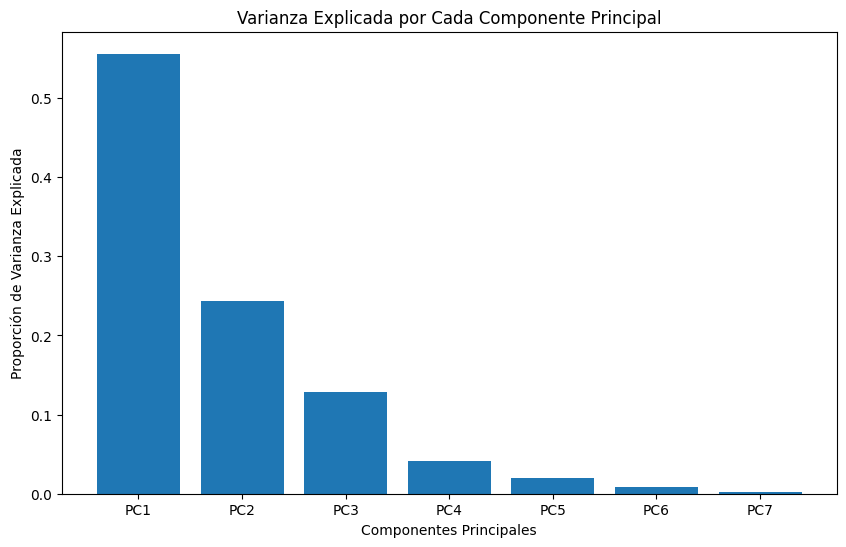

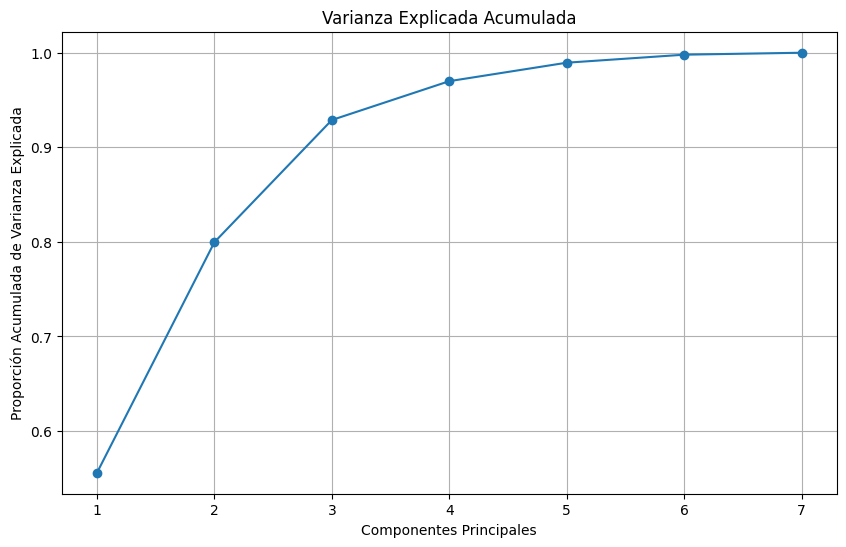

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las variables relevantes para el análisis
variables = data[['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(variables)

# Aplicar PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calcular la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=[f'PC{i}' for i in range(1, len(explained_variance) + 1)])
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.show()

# Acumular la varianza explicada para ver cuántas componentes se necesitan para cubrir el 95% de la información
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.grid(True)
plt.show()


PUNTO 5

Se evalua si la reducción de variables utilizando el Análisis de Componentes Principales (PCA) es una buena decisión para este conjunto de datos y si las componentes principales encontradas logran representar bien las variables originales.Par lograr esta solucion se siguen  los siguientes pasos:
1. Se evalua la varianza:
   En el Punto 4, observamos cuánta varianza es explicada por cada componente principal y por las componentes acumuladas. Si las primeras componentes explican una proporción significativa de la varianza (por ejemplo, más del 90%), es razonable realizar la reducción de dimensiones.
2. Comparar la cantidad de información:
   Evaluamos cuántas componentes principales se necesitan para explicar una cantidad suficiente de la varianza. Si podemos reducir el número de variables a solo 2 o 3 componentes sin perder mucha información, entonces la reducción es efectiva.
3. Análisis de la interpretación:
   Además de la cantidad de varianza explicada, debemos analizar si las componentes principales son interpretables. Si las componentes principales agrupan correctamente las características importantes del conjunto de datos, es una buena señal de que las componentes pueden reemplazar a las variables originales.



In [ ]:
# Mostrar las cargas de las variables originales en las componentes principales
pca_components = pd.DataFrame(pca.components_, columns=variables.columns)

# Mostrar las cargas (contribuciones) de cada variable en los primeros componentes
print(pca_components)


   housingMedianAge  totalRooms  totalBedrooms  population  households  \
0         -0.216227    0.488165       0.492856    0.472620    0.494542   
1          0.034990    0.070576      -0.057321   -0.084658   -0.043649   
2          0.938579    0.034634       0.124362    0.117901    0.144920   
3         -0.256846   -0.165800       0.149635   -0.200469    0.105029   
4         -0.070796   -0.408740      -0.328377    0.825645   -0.097197   
5          0.000798    0.734330      -0.335748    0.128910   -0.498425   
6          0.010377   -0.147361       0.703841    0.130645   -0.680893   

   medianIncome  medianHouseValue  
0      0.050078          0.039801  
1      0.700576          0.700450  
2     -0.191960          0.175078  
3     -0.633122          0.657334  
4     -0.050802          0.162391  
5     -0.253597          0.136658  
6      0.045834         -0.000554  
